# Kümeleme Çalışması

Elimizdeki nesneleri özelliklerine göre kümelere ayırıyoruz. Küme içindeki nesnelerin seçtiğimiz özelliklerine göre birbirine çok benzemesi gerekli. Gruplar birbirinden olabildiğince farklı olmalı. Ayırt edilebilmeli.

## Kütüphaneleri Yükle

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Veri Yükleme

In [30]:
ls

drive/  sample_data/


In [31]:
#pip install xlrd

In [32]:
df=pd.read_excel("/content/drive/MyDrive/BTK/day8/cars.xls")

## Veri ön işleme

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [35]:
X=df[["Price","Mileage","Cylinder"]]

## Modelleme

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
X.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [38]:
model=KMeans(n_clusters=4, random_state=42)

In [39]:
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [40]:
predicts=model.predict(X)
X["Cluster"]=predicts
X.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


Silhouette Skoru, küme yapısının kalitesini ölçer. Skor -1 ile 1 arasında değer alır:

1'e yakın değerler, veri noktalarının kendi kümelerine iyi uyum sağladığını ve komşu kümelerden iyi ayrıldığını gösterir. Bu, iyi bir kümeleme sonucuna işaret eder.
0 değeri, veri noktalarının kümeleri arasında belirsizlik olduğunu gösterir.
-1'e yakın değerler, veri noktalarının yanlış kümelere atandığını gösterir.

In [41]:
silhouette_score(X,model.labels_)
#silhouette_score(X,X["Cluster"])

0.41328609963181673

## Görselleştirme

<Axes: xlabel='Price', ylabel='Mileage'>

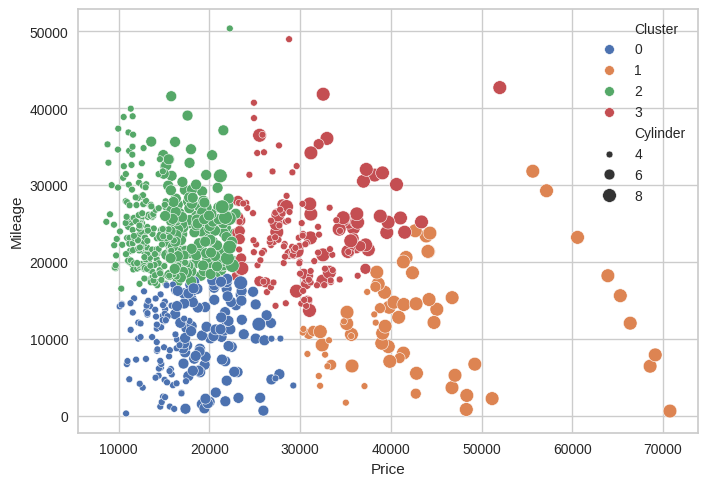

In [42]:
sns.scatterplot(x=X["Price"],y=X["Mileage"],hue=X["Cluster"],size=X["Cylinder"],palette="deep")

# 3 boyutlu görselleştirme

In [43]:
import plotly.graph_objects as go

# Plotly grafik objesini oluştur
fig = go.Figure()
#fig size
fig.update_layout(width=800, height=800)


# 3D scatter plot ekleyin
fig.add_trace(go.Scatter3d(
    x=X['Price'],
    y=X['Mileage'],
    z=X['Cylinder'],
    mode='markers',
    marker=dict(
        size=5, # Noktaların boyutu
        color=X['Cluster'], # Her bir noktanın rengi, Cluster sütununa göre
        colorscale='Viridis', # Renk skalası
        opacity=0.8
    )
))

# Grafik başlığı ve eksen etiketlerini ayarlayın
fig.update_layout(
    title='3D Kümeleme Görselleştirme',
    scene = dict(
        xaxis_title='Fiyat',
        yaxis_title='Kilometre',
        zaxis_title='Silindir'
    )
)

# Grafik göster
fig.show()

In [44]:
#pip install yellowbrick

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
df=pd.read_excel("/content/drive/MyDrive/BTK/day8/cars.xls")
X=df[["Price","Mileage","Cylinder"]]

In [46]:
X.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


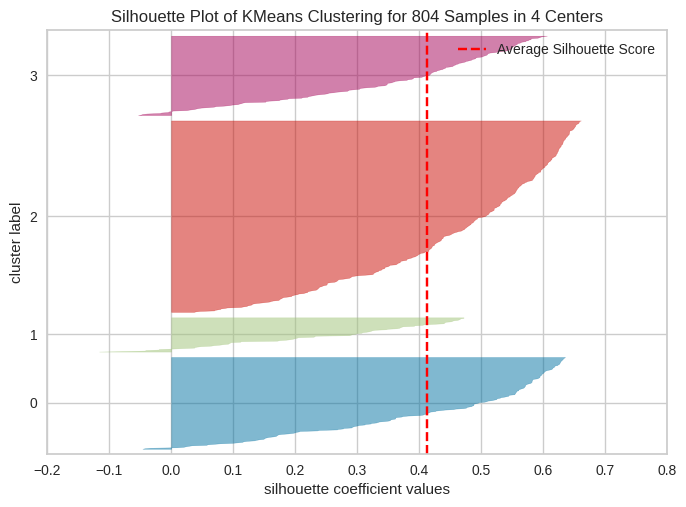

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 804 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
model=KMeans(n_clusters=4, random_state=42)
visualizer=SilhouetteVisualizer(model,colors="yellowbrick")
visualizer.fit(X)
visualizer.show()

In [48]:
wcss = [] # Within-Cluster-Sum-of-Squares
import warnings
warnings.filterwarnings('ignore')
ss=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(X, kmeans.predict(X)))

## Küme Sayısını Belirleme (Dirsek Yöntemi)

<Axes: >

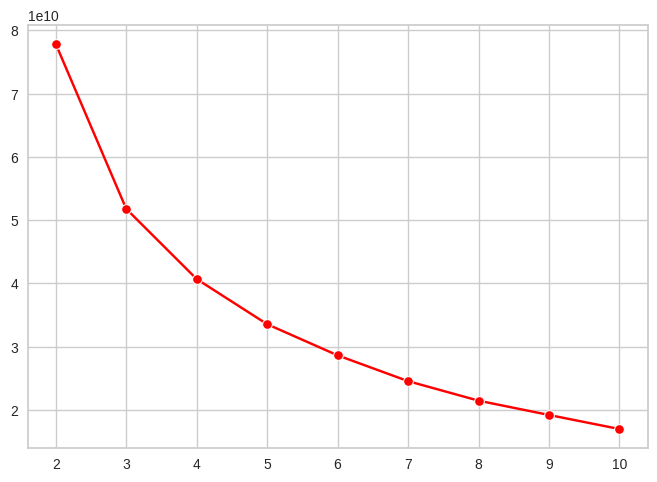

In [49]:
sns.lineplot(x=range(2, 11), y=wcss, marker='o', color='red')

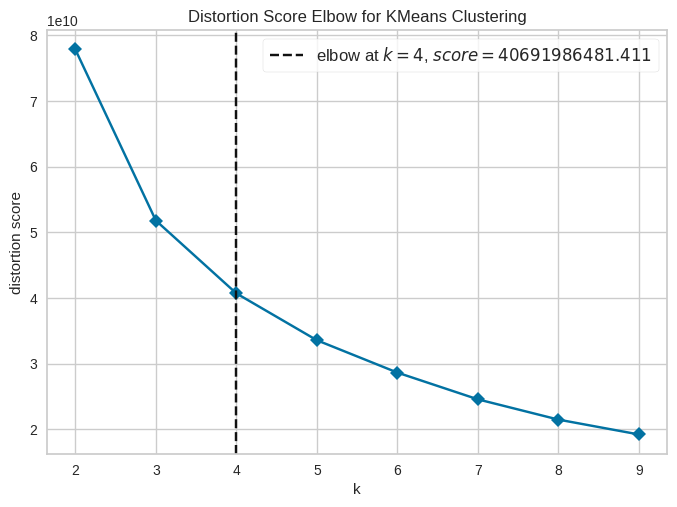

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.show()